In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook
#%matplotlib inline

# Branch Points

Definizione di alcune funzioni utili a visualizzare l'andamento delle funzioni

In [2]:
def cartesian_plot(x,y,z,fun_name,re_z_lims = None, im_z_lims = None):
    fig = plt.figure(figsize=(9.8,12))
    ax1 = fig.add_subplot(211, projection='3d')
    surf1 = ax1.plot_surface(x, y, np.real(z), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    if re_z_lims is not None:
        ax1.set_zlim(re_z_lims[0], re_z_lims[1])
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    ax1.set_xlabel("$\Re(z)$")
    ax1.set_ylabel("$\Im(z)$")
    ax1.set_title(r"$\Re\left("+fun_name+r"\right)$")
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf1, shrink=0.75, aspect=8)
    
    ax2 = fig.add_subplot(212, projection='3d')
    surf2 = ax2.plot_surface(x, y, np.imag(z), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    if im_z_lims is not None:
        ax2.set_zlim(im_z_lims[0], im_z_lims[1])
    
    ax2.set_xlabel("$\Re(z)$")
    ax2.set_ylabel("$\Im(z)$")
    ax2.set_title(r"$\Im\left("+fun_name+r"\right)$")
    
    fig.colorbar(surf2, shrink=0.75, aspect=8)
    
    plt.show()

In [3]:
def parametric_plot(x,y,z, fun_name, c_offset = None, z_lims=None):
    fig = plt.figure(figsize=(9.8,6))
    ax1 = fig.add_subplot(111, projection='3d')
    surf = []
    
    for i in range(len(z)):
        surf.append(ax1.plot_surface(x[i], y[i], z[i], cmap=cm.coolwarm, linewidth=0, antialiased=False))
    #surf12 = ax1.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    #surf12 = ax1.plot_wireframe(x2, y2, re_z2)
    
    if c_offset is not None:
        cset = ax1.contour(x[0], y[0], z[0], zdir='z', offset=c_offset[0], cmap=cm.coolwarm)
        cset = ax1.contour(x[0], y[0], z[0], zdir='x', offset=c_offset[1], cmap=cm.coolwarm)
        cset = ax1.contour(x[0], y[0], z[0], zdir='y', offset=c_offset[2], cmap=cm.coolwarm)

    if z_lims is not None:
        ax1.set_zlim(z_lims[0], z_lims[1])

    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    ax1.set_xlabel("$\Re(z)$")
    ax1.set_ylabel("$\Im(z)$")
    ax1.set_title(fun_name)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf[0], shrink=0.75, aspect=8)
    
    plt.show()

# Funzione

$$ w = \sqrt{z}$$

In [4]:
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X + 1j*Y)

<IPython.core.display.Javascript object>


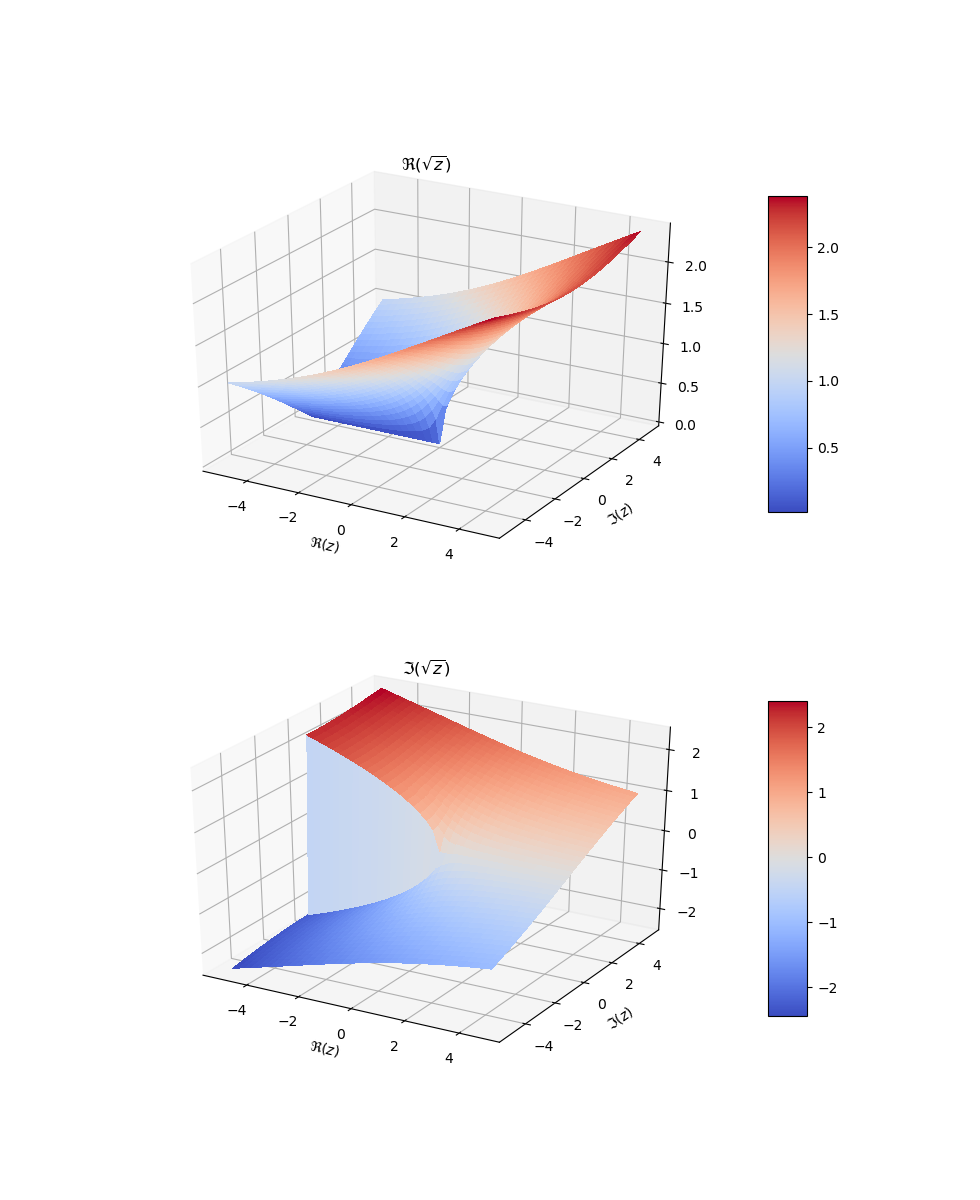

In [5]:
cartesian_plot(X,Y,R,r"\sqrt{z}")

Rappresentazione in coordinate polari. La funzione è suddivisa in 2

In [6]:
r = np.linspace(0,5,50)
t = np.linspace(0,2*np.pi, 50)
t1 = np.linspace(-2*np.pi,0, 50)

ρ1, θ1 = np.meshgrid(r,t)

ρ2, θ2 = np.meshgrid(r,t1)


x1 = ρ1*np.cos(θ1)
y1 = ρ1*np.sin(θ1)

x2 = ρ2*np.cos(θ2)
y2 = ρ2*np.sin(θ2)


re_z1 = np.sqrt(ρ1)*np.cos(θ1/2)
im_z1 = np.sqrt(ρ1)*np.sin(θ1/2)

re_z2 = np.sqrt(ρ2)*np.cos(θ2/2)
im_z2 = np.sqrt(ρ2)*np.sin(θ2/2)



<IPython.core.display.Javascript object>


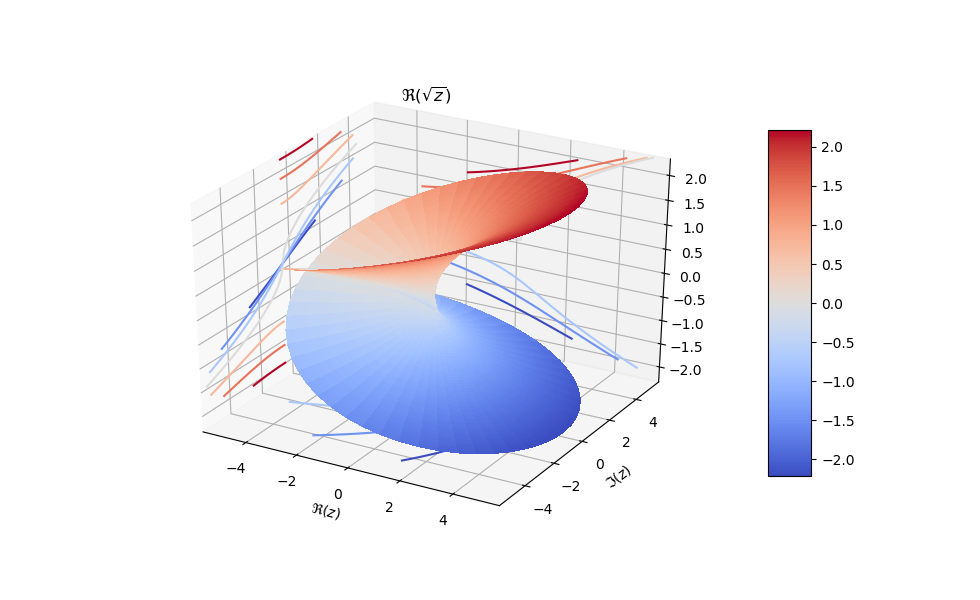

In [7]:
parametric_plot([x1,x2],[y1,y2],[re_z1,re_z2],fun_name=r'$\Re(\sqrt{z})$',c_offset=[-2.2,-6,6])

<IPython.core.display.Javascript object>


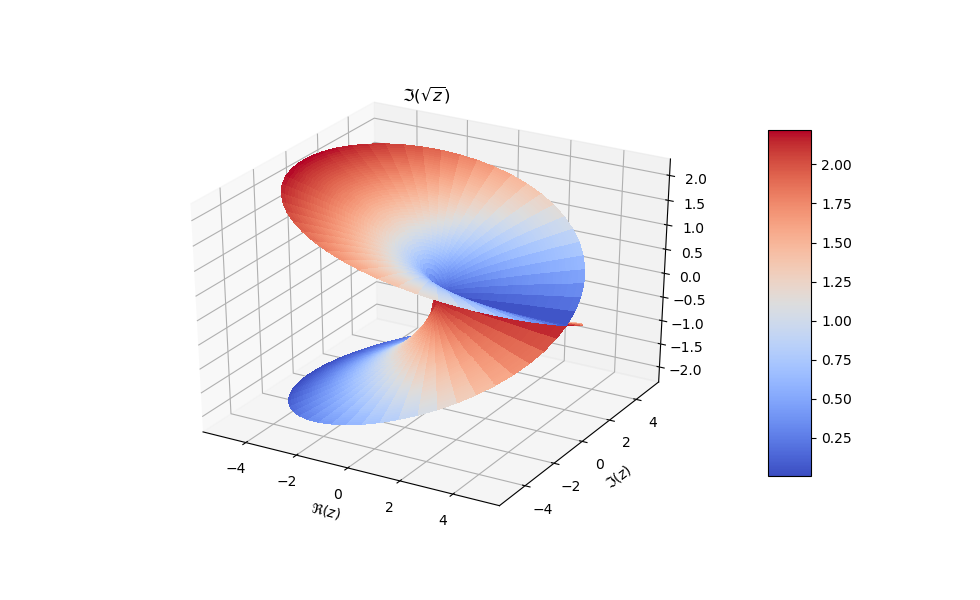

In [8]:
parametric_plot([x1,x2],[y1,y2],[im_z1,im_z2],fun_name=r'$\Im(\sqrt{z})$')

# Funzione:
$$ w = \frac{1}{\sqrt{z}}$$

In [9]:
# Make data.
X = np.linspace(-4.99,4.99,36)
Y = np.linspace(-4.99,4.99,36)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X + 1j*Y)**(-1)
Z1 = np.real(R)
#Z1[Z1>1.0] =np.NaN
Z2 = np.imag(R)

<IPython.core.display.Javascript object>


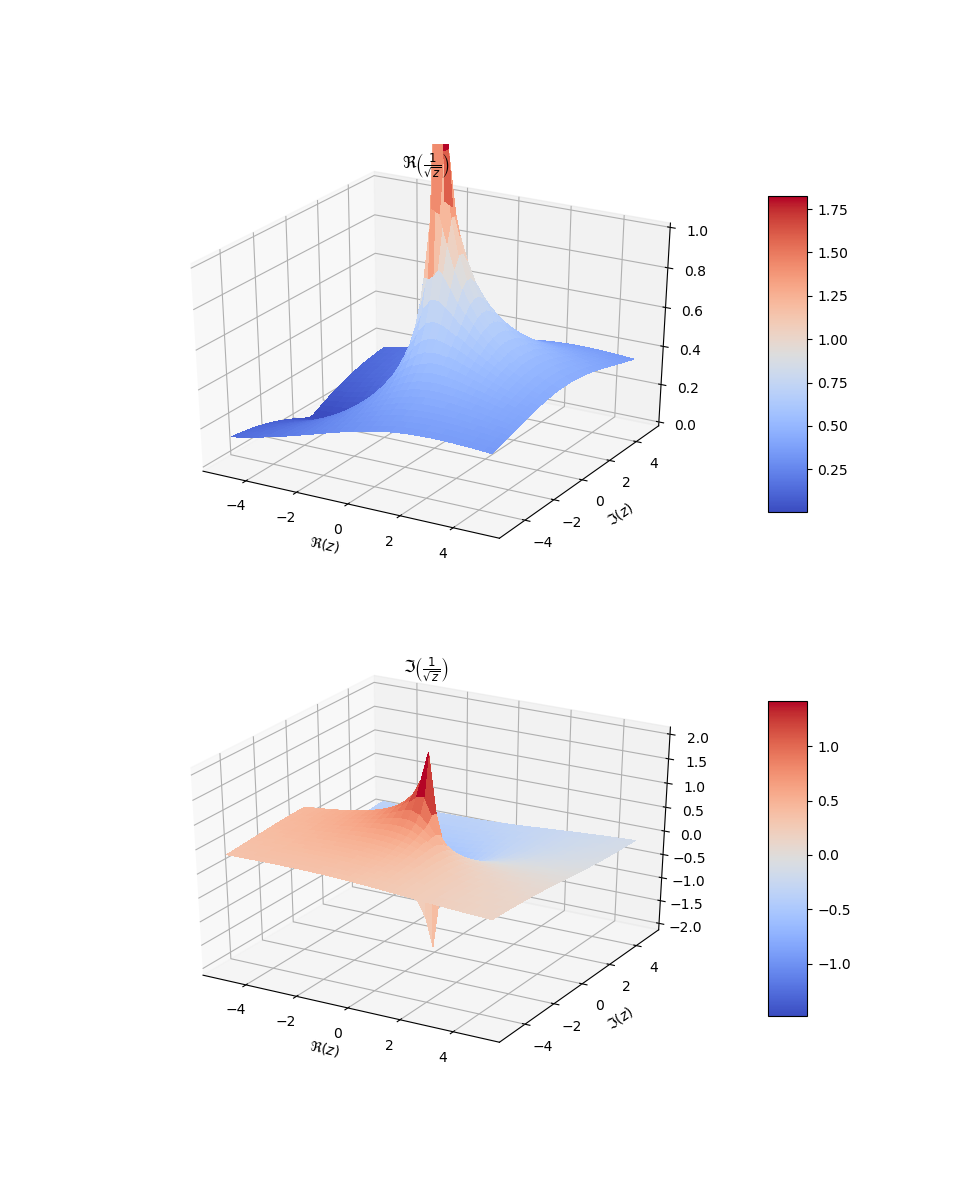

In [10]:
cartesian_plot(X,Y,R,r"\frac{1}{\sqrt{z}}",re_z_lims=[0,1.0])

Rappresentazione partendo da **coordinate polari** in un intervallo:
$$ -2\pi \leq \theta \leq 2\pi$$

In [11]:
r = np.linspace(0.25,5,50)
t = np.linspace(-2*np.pi,2*np.pi, 50)
#t1 = np.linspace(-2*np.pi,0, 50)

ρ, θ = np.meshgrid(r,t)

#ρ2, θ2 = np.meshgrid(r,t1)


x = ρ*np.cos(θ)
y = ρ*np.sin(θ)

#x2 = ρ2*np.cos(θ2)
#y2 = ρ2*np.sin(θ2)


re_z = (np.sqrt(ρ)**-1)*np.cos(θ/2)
im_z = (np.sqrt(ρ)**-1)*np.sin(-θ/2)

#re_z2 = np.sqrt(ρ2)*np.cos(θ2/2)
#im_z2 = np.sqrt(ρ2)*np.sin(θ2/2)

<IPython.core.display.Javascript object>


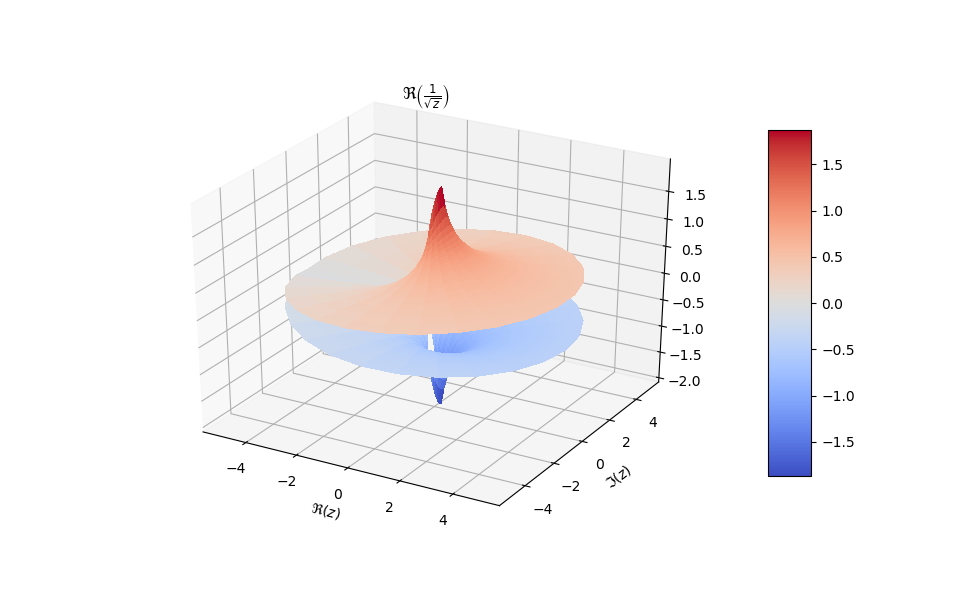

In [12]:
parametric_plot([x],[y],[re_z],fun_name=r'$\Re\left(\frac{1}{ \sqrt{z} }\right)$')

<IPython.core.display.Javascript object>


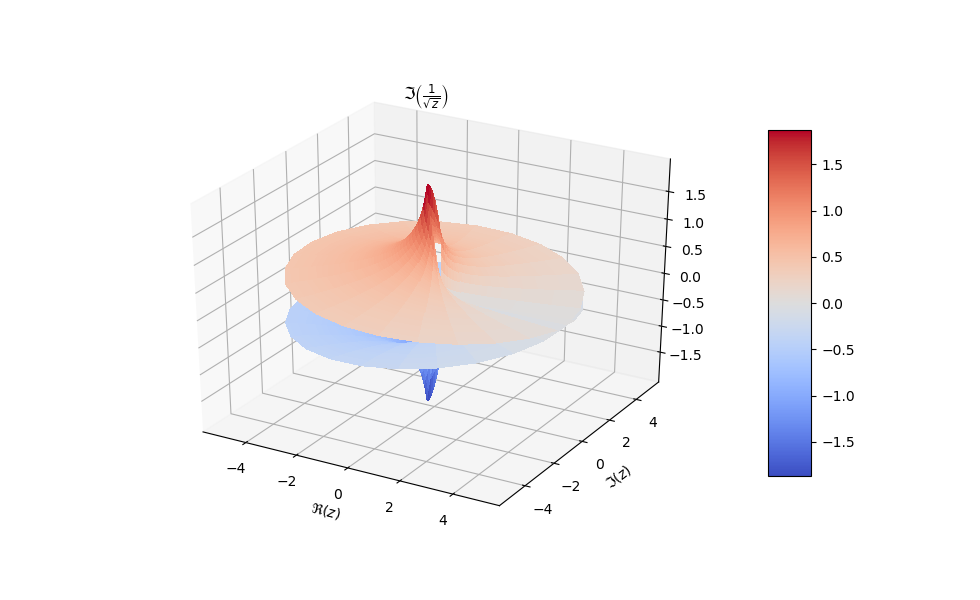

In [13]:
parametric_plot([x],[y],[im_z],fun_name=r'$\Im\left(\frac{1}{ \sqrt{z} }\right)$')

# Funzione:
$$ w = \log(z)$$

In [14]:
# Make data.
X = np.linspace(-4.99,4.99,36)
Y = np.linspace(-4.99,4.99,36)
X, Y = np.meshgrid(X, Y)
R = np.log(X + 1j*Y)
Z1 = np.real(R)
#Z1[Z1>1.0] =np.NaN
Z2 = np.imag(R)

<IPython.core.display.Javascript object>


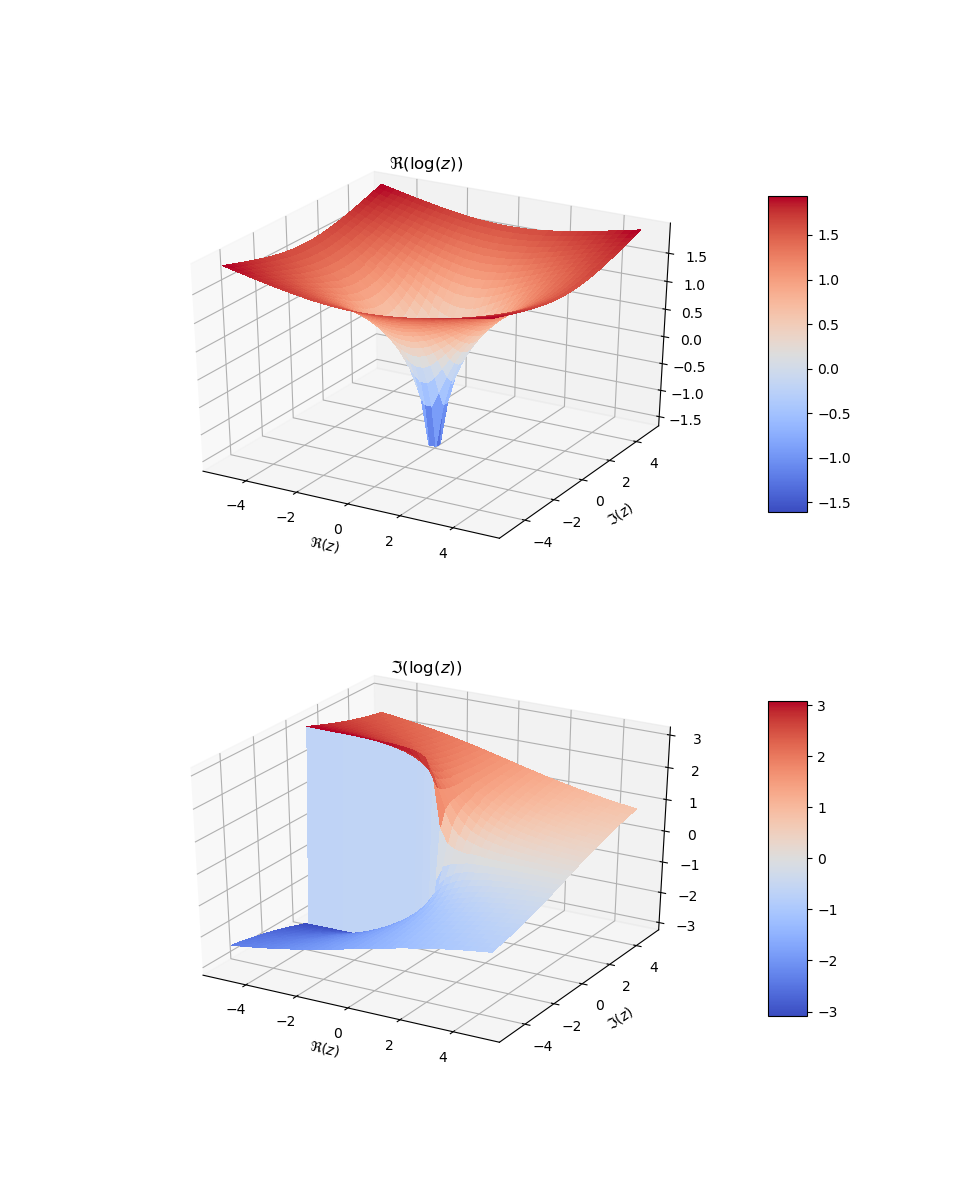

In [15]:
cartesian_plot(X,Y,R,r"\log(z)")

Rappresentazione partendo da **coordinate polari** in un intervallo:
$$ -4\pi \leq \theta \leq 4\pi$$

In [16]:
r = np.linspace(0.1,5,50)
t = np.linspace(-4*np.pi,4*np.pi, 150)
#t1 = np.linspace(-2*np.pi,0, 50)

ρ, θ = np.meshgrid(r,t)

#ρ2, θ2 = np.meshgrid(r,t1)


x = ρ*np.cos(θ)
y = ρ*np.sin(θ)

#x2 = ρ2*np.cos(θ2)
#y2 = ρ2*np.sin(θ2)


re_z = np.log(ρ)
im_z = θ

#re_z2 = np.sqrt(ρ2)*np.cos(θ2/2)
#im_z2 = np.sqrt(ρ2)*np.sin(θ2/2)

<IPython.core.display.Javascript object>


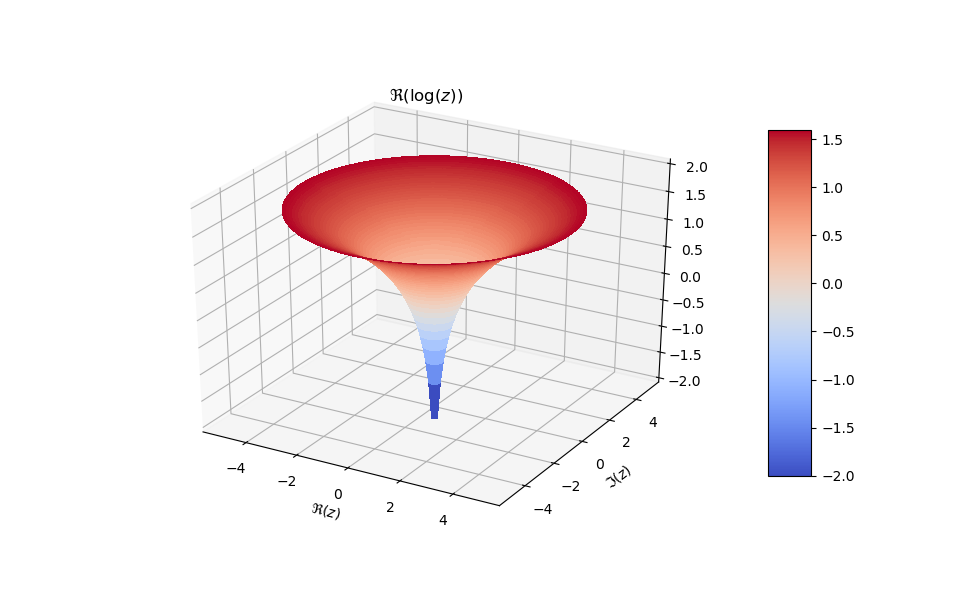

In [17]:
parametric_plot([x],[y],[re_z],fun_name=r"$\Re(\log(z))$", z_lims=[-2,2])

<IPython.core.display.Javascript object>


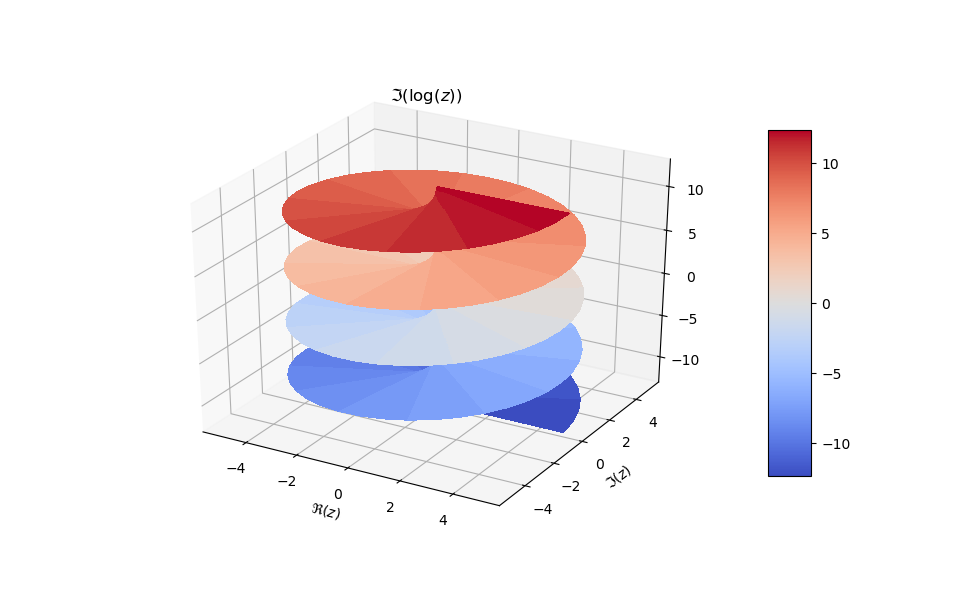

In [18]:
parametric_plot([x],[y],[im_z],fun_name=r"$\Im(\log(z))$")

# Funzione:
$$ w = z^{\sqrt{2}}$$

rappresentazione in coordinate polari

In [19]:
r = np.linspace(0,5,50)
t = np.linspace(-4*np.pi,4*np.pi, 450)
#t1 = np.linspace(-2*np.pi,0, 50)

ρ, θ = np.meshgrid(r,t)

#ρ2, θ2 = np.meshgrid(r,t1)


x = ρ*np.cos(θ)
y = ρ*np.sin(θ)

#x2 = ρ2*np.cos(θ2)
#y2 = ρ2*np.sin(θ2)


re_z = ρ**(np.sqrt(2))*np.cos(θ/np.sqrt(2))
im_z = ρ**(np.sqrt(2))*np.sin(θ/np.sqrt(2))

#re_z2 = np.sqrt(ρ2)*np.cos(θ2/2)
#im_z2 = np.sqrt(ρ2)*np.sin(θ2/2)

<IPython.core.display.Javascript object>


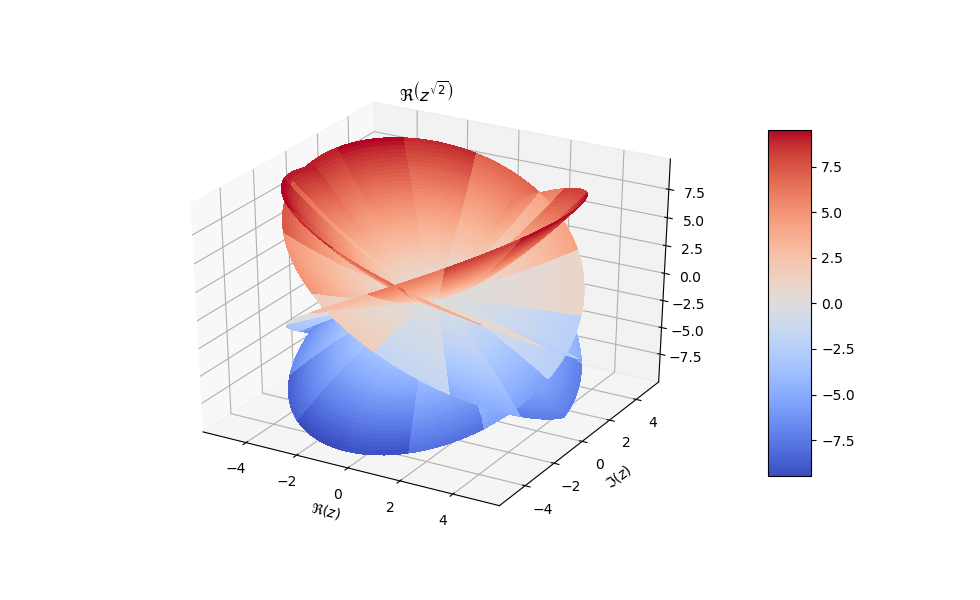

In [20]:
parametric_plot([x],[y],[re_z],fun_name=r'$\Re\left(z^{\sqrt{2}}\right)$')

<IPython.core.display.Javascript object>


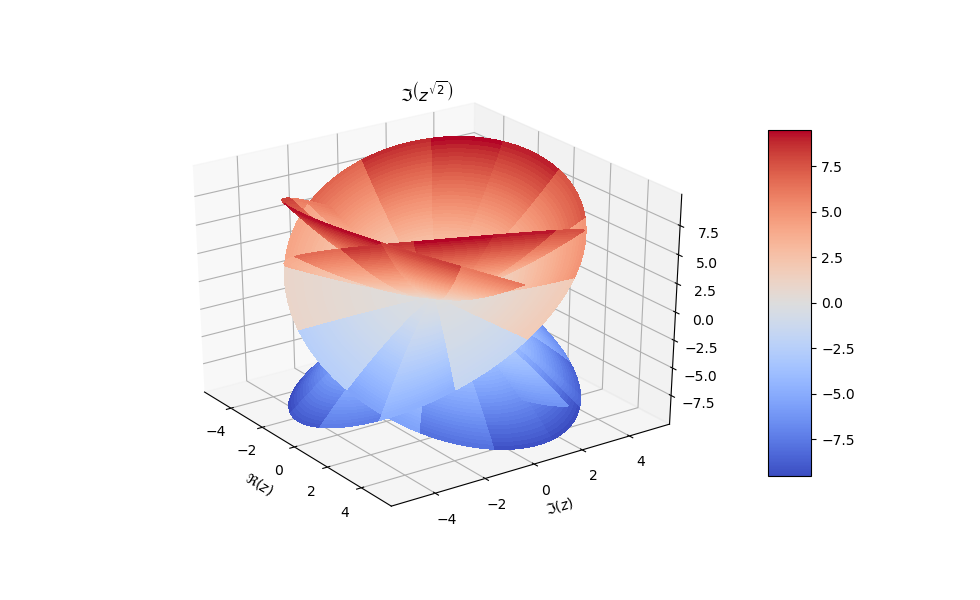

In [21]:
parametric_plot([x],[y],[im_z],fun_name=r'$\Im\left(z^{\sqrt{2}}\right)$')

# Funzione:
$$ w = (z-1+2i)^{\frac{1}{4}} $$

In [22]:
r = np.linspace(0,5,50)
t = np.linspace(0,2*np.pi, 150)
#t1 = np.linspace(-2*np.pi,0, 50)

ρ, θ = np.meshgrid(r,t)

#ρ2, θ2 = np.meshgrid(r,t1)


x = ρ*np.cos(θ)
y = ρ*np.sin(θ)

#x2 = ρ2*np.cos(θ2)
#y2 = ρ2*np.sin(θ2)

z = (x+1j*y+1-2j)**(0.25)

re_z = np.real(z)
im_z = np.imag(z)

#re_z2 = np.sqrt(ρ2)*np.cos(θ2/2)
#im_z2 = np.sqrt(ρ2)*np.sin(θ2/2)

<IPython.core.display.Javascript object>


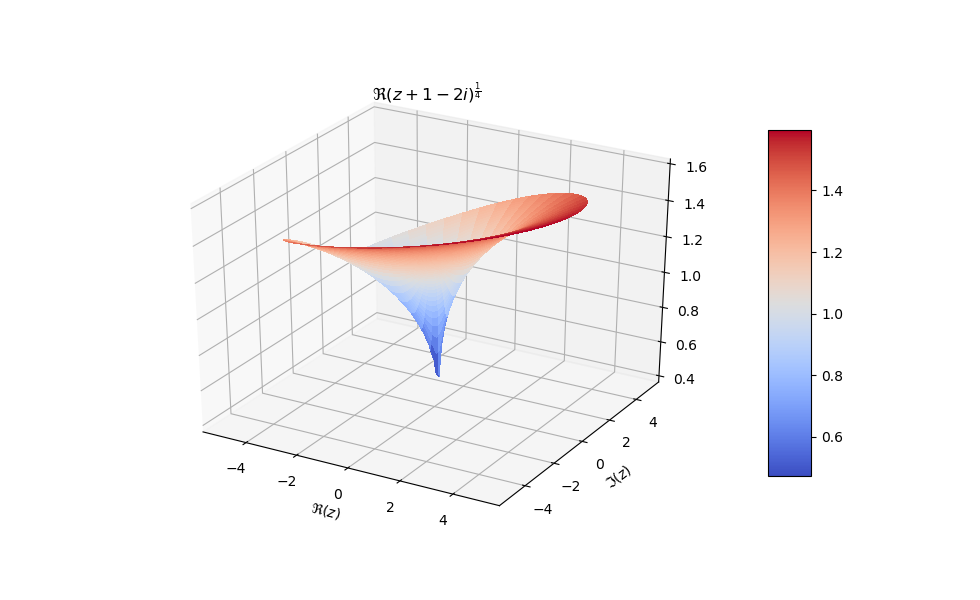

In [23]:
parametric_plot([x],[y],[re_z],fun_name=r'$\Re\left(z+1-2i\right)^{\frac{1}{4}}$')

<IPython.core.display.Javascript object>


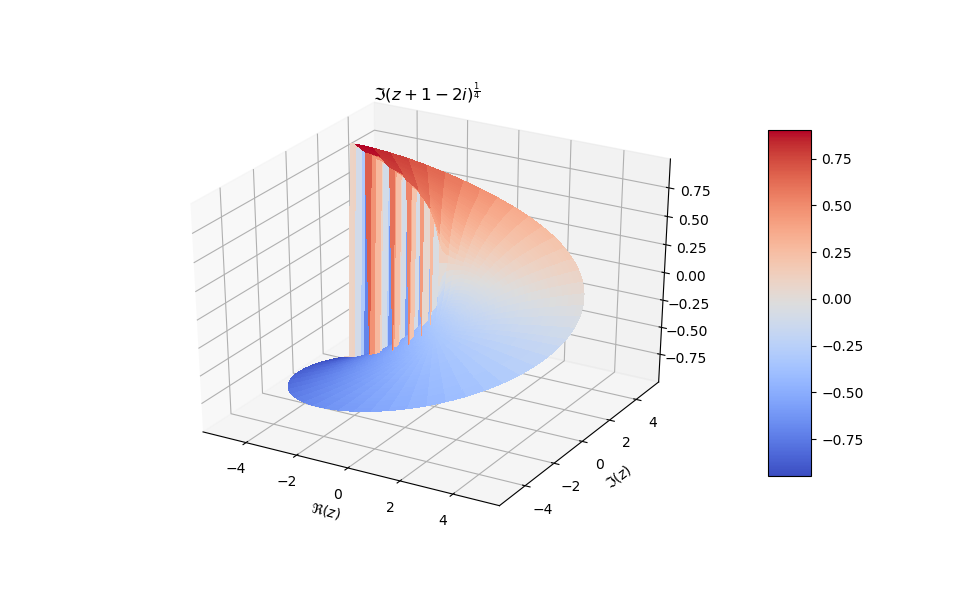

In [24]:
parametric_plot([x],[y],[im_z],fun_name=r'$\Im\left(z+1-2i\right)^{\frac{1}{4}}$')